In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset

from matplotlib import pyplot as plt

In [3]:
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size = 5)     # Output: 24x24
        self.pool1 = nn.AvgPool2d(2)                       # Output: 12x12
        self.conv2 = nn.Conv2d(6, 16, kernel_size = 5)    # Output: 8x8
        self.pool2 = nn.AvgPool2d(2)                      # Output: 4x4
        self.conv3 = nn.Conv2d(16, 120, kernel_size = 4)  # Output: 1x1
        self.fc1 = nn.Linear(120, 84)
        self.fc2 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool1(torch.tanh(self.conv1(x)))
        x = self.pool2(torch.tanh(self.conv2(x)))
        x = torch.tanh(self.conv3(x))
        x = x.view(x.size(0), -1)  # Flatten
        x = torch.tanh(self.fc1(x))
        x = self.fc2(x)
        return x

In [4]:
# Load and preprocess the MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root = './data', train = True, download = True, transform = transform)
test_dataset = datasets.MNIST(root = './data', train = False, download = True, transform = transform)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:02<00:00, 4609462.55it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 133618.17it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:06<00:00, 246125.96it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 5166945.69it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [5]:
# Use only 10,000 samples for evaluation
eval_dataset = Subset(test_dataset, range(10000))

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
eval_loader = DataLoader(eval_dataset, batch_size=128, shuffle=False)

In [6]:
# Initialize the model, loss function, and optimizer
model = LeNet5()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [7]:
# Training the model
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

In [8]:
# Lists to store training and validation metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Training the model
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Calculate training loss and accuracy
    train_loss = running_loss / len(train_loader)
    train_accuracy = correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Validation
    model.eval()
    val_running_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for images, labels in eval_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    # Calculate validation loss and accuracy
    val_loss = val_running_loss / len(eval_loader)
    val_accuracy = val_correct / val_total
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    # Print epoch results
    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')

Epoch 1/10, Train Loss: 0.0176, Train Accuracy: 0.9944, Val Loss: 0.0538, Val Accuracy: 0.9833
Epoch 2/10, Train Loss: 0.0161, Train Accuracy: 0.9948, Val Loss: 0.0483, Val Accuracy: 0.9852
Epoch 3/10, Train Loss: 0.0130, Train Accuracy: 0.9960, Val Loss: 0.0537, Val Accuracy: 0.9844
Epoch 4/10, Train Loss: 0.0114, Train Accuracy: 0.9964, Val Loss: 0.0479, Val Accuracy: 0.9864
Epoch 5/10, Train Loss: 0.0118, Train Accuracy: 0.9962, Val Loss: 0.0498, Val Accuracy: 0.9864
Epoch 6/10, Train Loss: 0.0097, Train Accuracy: 0.9969, Val Loss: 0.0497, Val Accuracy: 0.9871
Epoch 7/10, Train Loss: 0.0092, Train Accuracy: 0.9972, Val Loss: 0.0529, Val Accuracy: 0.9865
Epoch 8/10, Train Loss: 0.0090, Train Accuracy: 0.9970, Val Loss: 0.0526, Val Accuracy: 0.9869
Epoch 9/10, Train Loss: 0.0089, Train Accuracy: 0.9969, Val Loss: 0.0567, Val Accuracy: 0.9871
Epoch 10/10, Train Loss: 0.0063, Train Accuracy: 0.9982, Val Loss: 0.0514, Val Accuracy: 0.9876


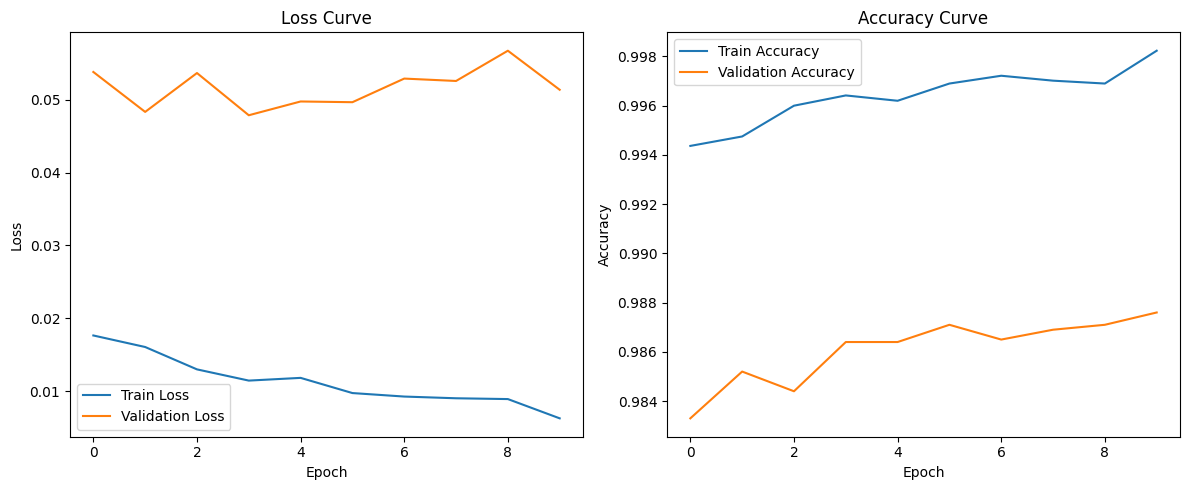

In [9]:
# Plotting the loss and accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')

plt.tight_layout()
plt.show()

In [10]:
# Evaluating the model
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in eval_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Test accuracy: {accuracy:.4f}')

Test accuracy: 0.9876


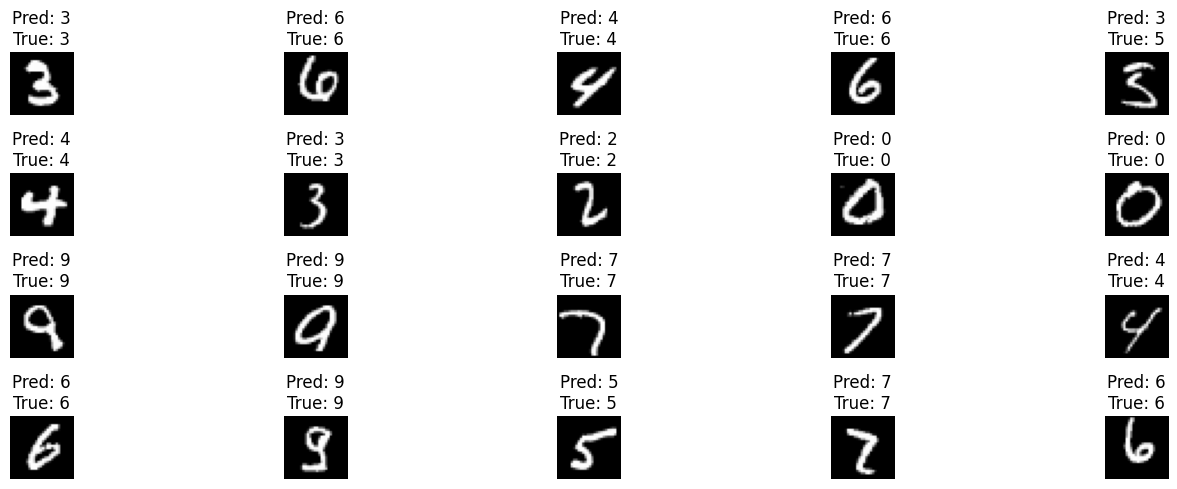

In [13]:
import matplotlib.pyplot as plt
import random

# Function to display images and predictions
def display_random_samples(model, dataset, num_samples=20):
    model.eval()
    random_indices = random.sample(range(len(dataset)), num_samples)
    images, labels = zip(*[dataset[i] for i in random_indices])

    with torch.no_grad():
        images_tensor = torch.stack(images)
        outputs = model(images_tensor)
        _, predicted = torch.max(outputs.data, 1)

    # Plotting the images
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        plt.subplot(4, 5, i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        plt.title(f'Pred: {predicted[i].item()}\nTrue: {labels[i]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display 20 random samples
display_random_samples(model, eval_dataset, num_samples=20)

In [ ]:
import numpy as np

z1 = -317.0
z2 = 198.0
z3 = np.exp(1)
print(z1)
print(z2)
print(z3)

-317.0
198.0
2.718281828459045


In [ ]:
np.exp(z1)

2.131322828462168e-138

In [ ]:
np.exp(z2)

9.779292065696318e+85

In [ ]:
np.exp(z1)/(np.exp(z1)+np.exp(z2)+np.exp(z3))

2.179424455414719e-224

In [ ]:
np.exp(z2)/(np.exp(z1)+np.exp(z2)+np.exp(z3))

1.0